In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from matplotlib import cm
import imageio

In [2]:
HEIGHT = 256
WIDTH = 256
BITS = 3

In [3]:
def encode(cover_name, hidden_name):
    cover_pix = mpimg.imread(cover_name)
    hidden_pix = mpimg.imread(hidden_name)
    output_image = np.empty((HEIGHT, WIDTH, 3))
    for x in range(WIDTH):
        for y in range(HEIGHT):
            cover_R = '{0:08b}'.format(cover_pix[x][y][0])
            cover_G = '{0:08b}'.format(cover_pix[x][y][1])
            cover_B = '{0:08b}'.format(cover_pix[x][y][2])
            hidden_R = '{0:08b}'.format(hidden_pix[x][y][0])
            hidden_G = '{0:08b}'.format(hidden_pix[x][y][1])
            hidden_B = '{0:08b}'.format(hidden_pix[x][y][2])
            output_R = int(cover_R[:8-BITS] + hidden_R[:BITS], 2)
            output_G = int(cover_G[:8-BITS] + hidden_G[:BITS], 2)
            output_B = int(cover_B[:8-BITS] + hidden_B[:BITS], 2)
            output_image[x][y] = [output_R, output_G, output_B]
    return output_image

In [4]:
def decode(hidden_pix):
    hidden_pix = hidden_pix
    output_image = np.empty((HEIGHT, WIDTH, 3))
    for x in range(WIDTH):
        for y in range(HEIGHT):
            hidden_R = '{0:08b}'.format(int(hidden_pix[x][y][0]))
            recoverd_R = hidden_R[-BITS:] +  ''.join(['0' for a in range(8-BITS)])
            hidden_G = '{0:08b}'.format(int(hidden_pix[x][y][1]))
            recoverd_G = hidden_G[-BITS:] + ''.join(['0' for a in range(8-BITS)])
            hidden_B = '{0:08b}'.format(int(hidden_pix[x][y][2]))
            recoverd_B = hidden_B[-BITS:] + ''.join(['0' for a in range(8-BITS)])
            output_R = int(recoverd_R, 2) / 255.0
            output_G = int(recoverd_G, 2) / 255.0
            output_B = int(recoverd_B, 2) / 255.0
            output_image[x][y] = [output_R, output_G, output_B]
    return output_image

In [5]:
hidden_img = encode("cover.jpg", "hidden.jpg")

In [6]:
decoded_image = decode(hidden_img)

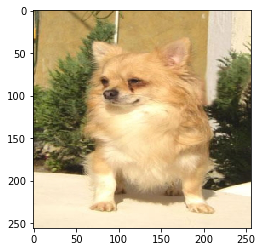

In [7]:
plt.imshow(mpimg.imread("cover.jpg"))

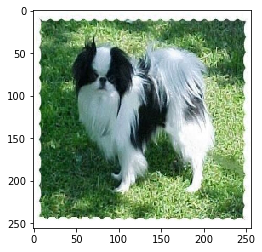

In [8]:
plt.imshow(mpimg.imread("hidden.jpg"))

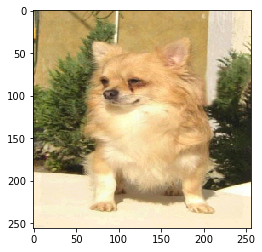

In [9]:
plt.imshow(hidden_img/255.0)

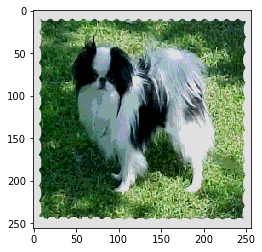

In [10]:
plt.imshow(decoded_image)